In [151]:
import pybaseball as pb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.patches import Ellipse, Polygon
import numpy as np
import os
import seaborn as sns

## Reading in Fangraphs data and cleaning 

In [85]:
fg_df = pb.batting_stats(2021, qual=200)
col_list = []
for col in fg_df.columns:
    col_list.append(col)
col_list
fg_df.sort_values(by=['HardHit%'], ascending=False, ignore_index=True)
col_list

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'G',
 'AB',
 'PA',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'R',
 'RBI',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'SF',
 'SH',
 'GDP',
 'SB',
 'CS',
 'AVG',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Pitches',
 'Balls',
 'Strikes',
 'IFH',
 'BU',
 'BUH',
 'BB%',
 'K%',
 'BB/K',
 'OBP',
 'SLG',
 'OPS',
 'ISO',
 'BABIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'wOBA',
 'wRAA',
 'wRC',
 'Bat',
 'Fld',
 'Rep',
 'Pos',
 'RAR',
 'WAR',
 'Dol',
 'Spd',
 'wRC+',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'phLI',
 'PH',
 'WPA/LI',
 'Clutch',
 'FB% (Pitch)',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'BsR',
 'FA% (sc)',
 

In [134]:
'''Removing columns we dont want '''
plot_df = (
    fg_df
     .pipe(lambda df: df[["IDfg", "Name", "Team", 'G', 'PA', 'AVG', 'OBP', 'SLG', 'OPS', 'wRC+', 'WAR',  'Barrel%', 'HardHit%', 'GB%', 'FB%', 'HR/FB']]) # just getting the columns we need
)


/var/folders/6y/ylm_09j57zscgtclh5kxdx1h0000gn/T/ipykernel_32110/2418834400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['HardHit%'] = plot_df['HardHit%'] * 100
/var/folders/6y/ylm_09j57zscgtclh5kxdx1h0000gn/T/ipykernel_32110/2418834400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Barrel%'] = plot_df['Barrel%'] * 100
/var/folders/6y/ylm_09j57zscgtclh5kxdx1h0000gn/T/ipykernel_32110/2418834400.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,IDfg,Name,Team,G,PA,AVG,OBP,SLG,OPS,wRC+,WAR,Barrel%,HardHit%,GB%,FB%,HR/FB
17,16252,Trea Turner,- - -,148,646,0.328,0.375,0.536,0.911,142,6.9,7.4,46.0,45.2,33.7,0.170
2,19611,Vladimir Guerrero Jr.,TOR,161,698,0.311,0.401,0.601,1.002,166,6.7,15.1,55.2,44.8,36.5,0.265
0,11579,Bryce Harper,PHI,141,599,0.309,0.429,0.615,1.044,170,6.6,18.1,49.2,40.7,37.3,0.267
1,20123,Juan Soto,WSN,151,654,0.313,0.465,0.534,0.999,163,6.6,13.3,52.4,52.7,28.7,0.244
42,12533,Marcus Semien,TOR,162,724,0.265,0.334,0.538,0.873,131,6.6,9.8,41.3,31.0,48.1,0.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12977,Michael Perez,PIT,70,231,0.143,0.221,0.290,0.511,38,-0.9,6.3,32.4,45.7,40.0,0.125
356,14885,Pat Valaika,BAL,91,281,0.201,0.250,0.290,0.540,46,-1.0,4.8,32.6,30.3,48.6,0.056
354,24655,Owen Miller,CLE,60,202,0.204,0.243,0.309,0.551,49,-1.1,5.8,32.6,54.3,25.4,0.114
314,12907,Gregory Polanco,PIT,107,382,0.208,0.283,0.354,0.637,71,-1.2,9.6,47.9,38.2,44.1,0.105


In [ ]:
plot_df['HardHit%'] = plot_df['HardHit%'] * 100
plot_df['Barrel%'] = plot_df['Barrel%'] * 100
plot_df['GB%'] = plot_df['GB%'] * 100
plot_df['FB%'] = plot_df['FB%'] * 100
plot_df




In [135]:
plot_df.sort_values(by=['WAR'], ascending=False, ignore_index=True)

,IDfg,Name,Team,G,PA,AVG,OBP,SLG,OPS,wRC+,WAR,Barrel%,HardHit%,GB%,FB%,HR/FB
0,16252,Trea Turner,- - -,148,646,0.328,0.375,0.536,0.911,142,6.9,7.4,46.0,45.2,33.7,0.170
1,19611,Vladimir Guerrero Jr.,TOR,161,698,0.311,0.401,0.601,1.002,166,6.7,15.1,55.2,44.8,36.5,0.265
2,11579,Bryce Harper,PHI,141,599,0.309,0.429,0.615,1.044,170,6.6,18.1,49.2,40.7,37.3,0.267
3,12533,Marcus Semien,TOR,162,724,0.265,0.334,0.538,0.873,131,6.6,9.8,41.3,31.0,48.1,0.184
4,20123,Juan Soto,WSN,151,654,0.313,0.465,0.534,0.999,163,6.6,13.3,52.4,52.7,28.7,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,12977,Michael Perez,PIT,70,231,0.143,0.221,0.290,0.511,38,-0.9,6.3,32.4,45.7,40.0,0.125
358,14885,Pat Valaika,BAL,91,281,0.201,0.250,0.290,0.540,46,-1.0,4.8,32.6,30.3,48.6,0.056
359,24655,Owen Miller,CLE,60,202,0.204,0.243,0.309,0.551,49,-1.1,5.8,32.6,54.3,25.4,0.114
360,12907,Gregory Polanco,PIT,107,382,0.208,0.283,0.354,0.637,71,-1.2,9.6,47.9,38.2,44.1,0.105


In [136]:
'''Couldn't get this to work'''
# full_stats = pd.merge(bb_pct_df, hard_hit_df, on='Name')
# full_stats

"Couldn't get this to work"

In [137]:
# export plot_df to csv for interactive plot
plot_df.to_csv("balls_seen.csv", index=False)

(20.0, 190.0)

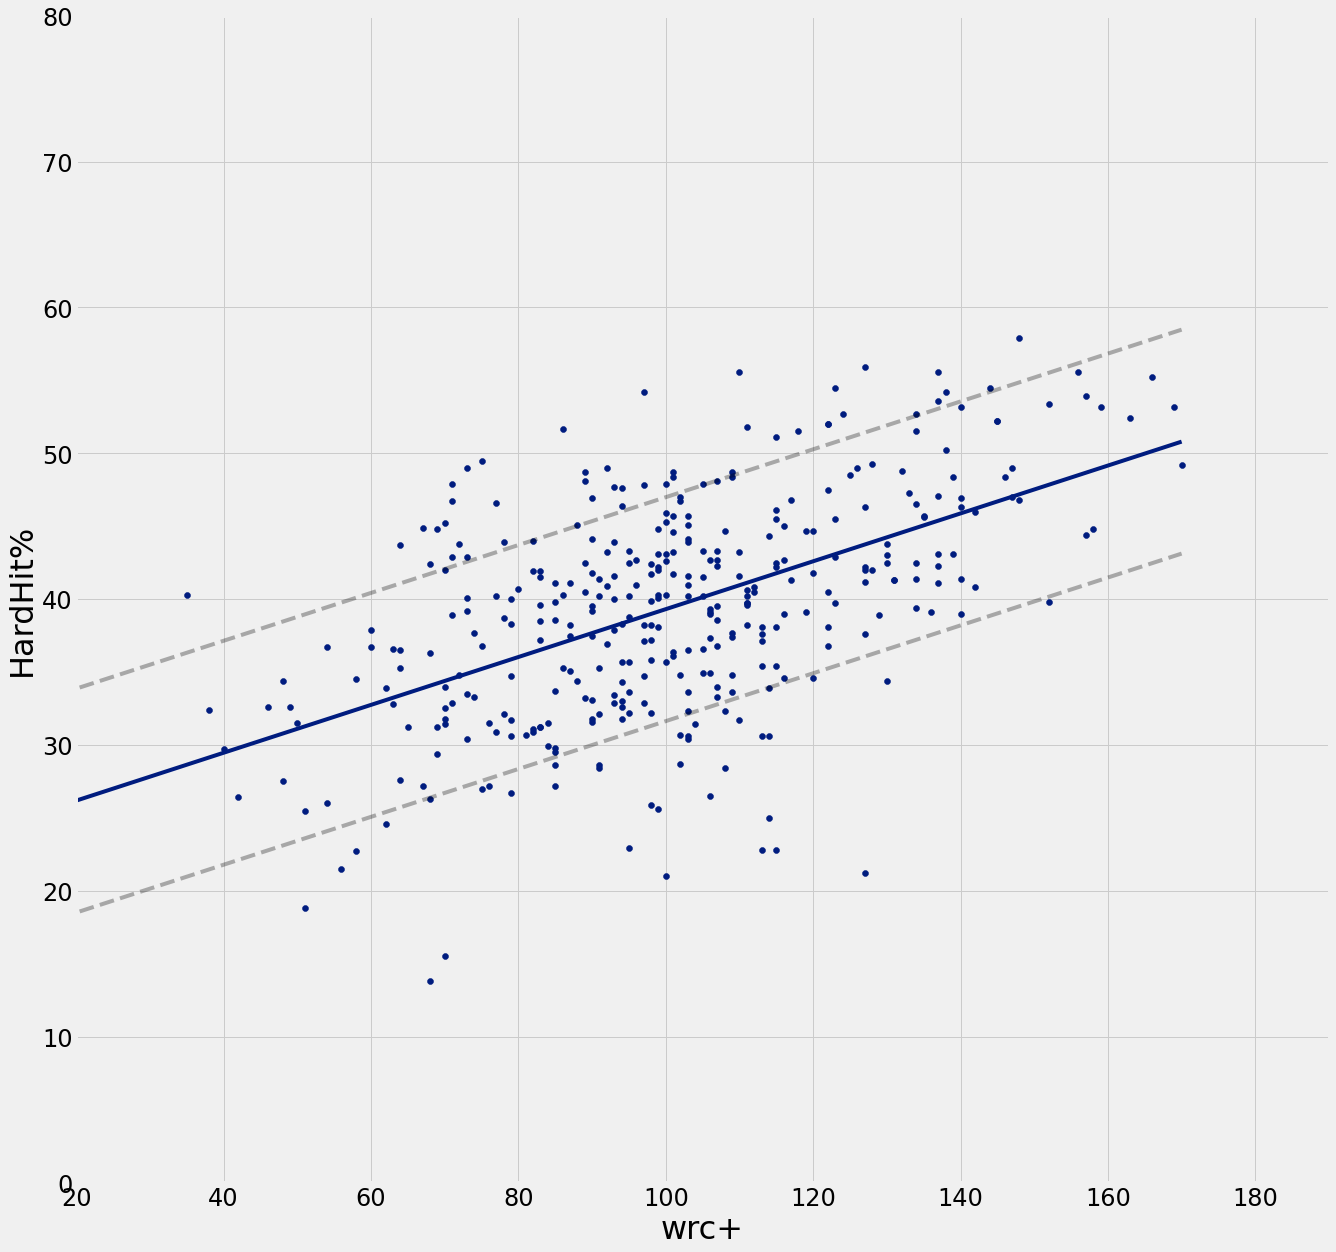

In [138]:
# plotting utils
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.4)

# # decided what faces I want to highlight and downloaded the face into the directory as jpgs
# notable_names = [f.split(".jpg")[0] for f in os.listdir(path="notable_faces") if 'jpg' in f]
# df_notables = plot_df[plot_df["Name"].isin(notable_names)]

# start plotting
style.use('seaborn-dark-palette')
# plt.style.library['fivethirtyeight']

f, ax = plt.subplots( figsize=(20,20))

Y = plot_df["HardHit%"]
X = plot_df["wRC+"]

ax.scatter(X, Y, label="Everyone Else")


# add regression and standard deviation lines
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, Y, 1)

#add linear regression lines to scatterplot and
x_linspace = np.linspace(0, X.max(),100)
y_sigma = Y.std()
plt.plot(x_linspace, m*x_linspace+b, label="linear regression")
plt.plot(x_linspace, m*x_linspace+(b + y_sigma), c="k", ls="--", alpha=0.3, label="1 std dev") # one standard deviation up
# # plt.plot(x_linspace, m*x_linspace+(b + ( 2 * y_sigma)), c="k", ls="--", alpha=0.3) # two standard deviation up
# plt.plot(x_linspace, m*x_linspace+(b + ( 3 * y_sigma)), c="k", ls=":", alpha=0.4, label="3 std dev") # three standard deviation up
plt.plot(x_linspace, m*x_linspace+(b - Y.std()), c="k", ls="--", alpha=0.3) # one standard deviation up


# # axis labels and stuff
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
plt.ylabel("HardHit%", size=32)
plt.xlabel("wrc+", size=32)
plt.ylim([0, 80])
plt.xlim([20, 190])



# # rest of the plot
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.legend(loc="lower right", prop={'size': 18})
# plt.title("Number of Balls Seen vs Walks 2021 (min 200 PA)", size=40, pad=30)
# plt.tight_layout()
# plt.annotate("by u/double_dose_larry", (.01,.01), xycoords='figure fraction')
# plt.savefig("balls_seen.png")


In [139]:

plot_df.loc[(plot_df['wRC+'] >= 120) & (plot_df['HardHit%'] <= 30)]

,IDfg,Name,Team,G,PA,AVG,OBP,SLG,OPS,wRC+,WAR,Barrel%,HardHit%,GB%,FB%,HR/FB
70,14894,Tony Kemp,OAK,131,397,0.279,0.382,0.418,0.8,127,2.7,1.0,21.2,35.0,41.9,0.069


In [140]:
''''Locating players with high hardhit and lower wrc+'''
plot_df.loc[(plot_df['wRC+'] <= 100) & (plot_df['HardHit%'] >= 50)]

,IDfg,Name,Team,G,PA,AVG,OBP,SLG,OPS,wRC+,WAR,Barrel%,HardHit%,GB%,FB%,HR/FB
270,20202,Brandon Marsh,LAA,70,260,0.254,0.317,0.356,0.673,86,1.0,10.9,51.7,43.8,25.0,0.056
225,15191,Chad Pinder,OAK,75,233,0.243,0.300,0.411,0.712,97,0.4,16.3,54.2,48.4,30.7,0.128


In [141]:
plot_df.loc[(plot_df['Name'] == 'Eric Hosmer')]

,IDfg,Name,Team,G,PA,AVG,OBP,SLG,OPS,wRC+,WAR,Barrel%,HardHit%,GB%,FB%,HR/FB
174,3516,Eric Hosmer,SDP,151,565,0.269,0.337,0.395,0.732,102,0.0,5.8,47.0,55.5,25.8,0.113


In [150]:

ground_df = plot_df.sort_values(by=['GB%'], ascending=False, ignore_index=True)
ground_df.mean()

/var/folders/6y/ylm_09j57zscgtclh5kxdx1h0000gn/T/ipykernel_32110/1255567440.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ground_df.mean()


IDfg        13981.218232
G             114.723757
PA            426.872928
AVG             0.248227
OBP             0.321798
SLG             0.419931
OPS             0.741740
wRC+          100.701657
WAR             1.632044
Barrel%         8.336188
HardHit%       39.425414
GB%            42.307182
FB%            36.951934
HR/FB           0.136909
dtype: float64

In [156]:
'''Want to test a correlation matrix for stats'''
corr_df = (
    plot_df
     .pipe(lambda df: df[['AVG', 'OBP', 'SLG', 'wRC+', 'WAR',  'Barrel%', 'GB%', 'FB%']]) # just getting the columns we need
)
corr_df

,AVG,OBP,SLG,wRC+,WAR,Barrel%,GB%,FB%
17,0.328,0.375,0.536,142,6.9,7.4,45.2,33.7
2,0.311,0.401,0.601,166,6.7,15.1,44.8,36.5
0,0.309,0.429,0.615,170,6.6,18.1,40.7,37.3
1,0.313,0.465,0.534,163,6.6,13.3,52.7,28.7
42,0.265,0.334,0.538,131,6.6,9.8,31.0,48.1
...,...,...,...,...,...,...,...,...
360,0.143,0.221,0.290,38,-0.9,6.3,45.7,40.0
356,0.201,0.250,0.290,46,-1.0,4.8,30.3,48.6
354,0.204,0.243,0.309,49,-1.1,5.8,54.3,25.4
314,0.208,0.283,0.354,71,-1.2,9.6,38.2,44.1


<AxesSubplot:>

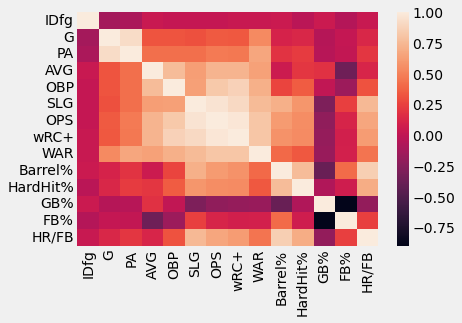

In [159]:
correlation_matrix = plot_df.corr(method='pearson')
sns.heatmap(correlation_matrix)